# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [24]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from plotnine import ggplot, aes, geom_point, geom_smooth, theme_light, labs
from sklearn.preprocessing import PolynomialFeatures


In [25]:
#!pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [26]:
penguins = penguins.dropna()
X = penguins[['bill_length_mm']]
y = penguins['bill_depth_mm']

## **Linear Regression Model**

In [27]:
#from scipy.sparse.linalg._isolve.lsqr import lsqr
## Preprocessing: One-hot-encode
## Model spec:  Linear Regression

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()
enc = OneHotEncoder()


# [('scaler', StandardScaler()), ('svc', SVC())]

my_pipeline = Pipeline(
    [('OLS', lr)])


fitted_pipeline = my_pipeline.fit(X_train, y_train)
fitted_pipeline

Pipeline(steps=[('OLS', LinearRegression())])

In [28]:
y_preds = fitted_pipeline.predict(X_test)
y_preds

array([16.54780977, 17.62422358, 17.43627831, 16.89807141, 17.29959084,
       16.82972767, 16.95787217, 16.5905246 , 17.63276655, 17.00912997,
       17.90614148, 17.00912997, 17.55587985, 17.70965325, 17.00058701,
       17.49607908, 16.94932921, 17.57296578, 17.24833304, 17.46190721,
       16.12066143, 16.58198163, 16.5392668 , 16.5648957 , 16.45383713,
       16.77846987, 17.42773535, 17.38502051, 16.98350107, 17.42773535,
       17.80362588, 16.1292044 , 17.20561821, 17.51316501, 16.88952844,
       16.75284097, 16.94932921, 16.5136379 , 16.78701284, 16.57343867,
       17.45336425, 16.76138394, 17.38502051, 17.56442281, 16.77846987,
       17.82925478, 17.35939161, 16.95787217, 16.75284097, 16.62469647,
       17.27396194, 16.3854934 , 16.83827064, 16.8211847 , 17.52170798,
       17.57296578, 17.50462205, 16.83827064, 17.56442281, 16.3342356 ,
       17.42773535, 17.30813381, 17.03475887, 16.4111223 , 17.00058701,
       17.58150875, 17.82071182, 16.78701284, 16.99204404, 18.06

In [29]:
X_test['y_test'] = y_test
X_test['Y_pred'] = y_preds
X_test.head()

,bill_length_mm,y_test,Y_pred
318,50.9,19.1,16.547810
88,38.3,19.2,17.624224
29,40.5,18.9,17.436278
337,46.8,16.5,16.898071
79,42.1,19.1,17.299591


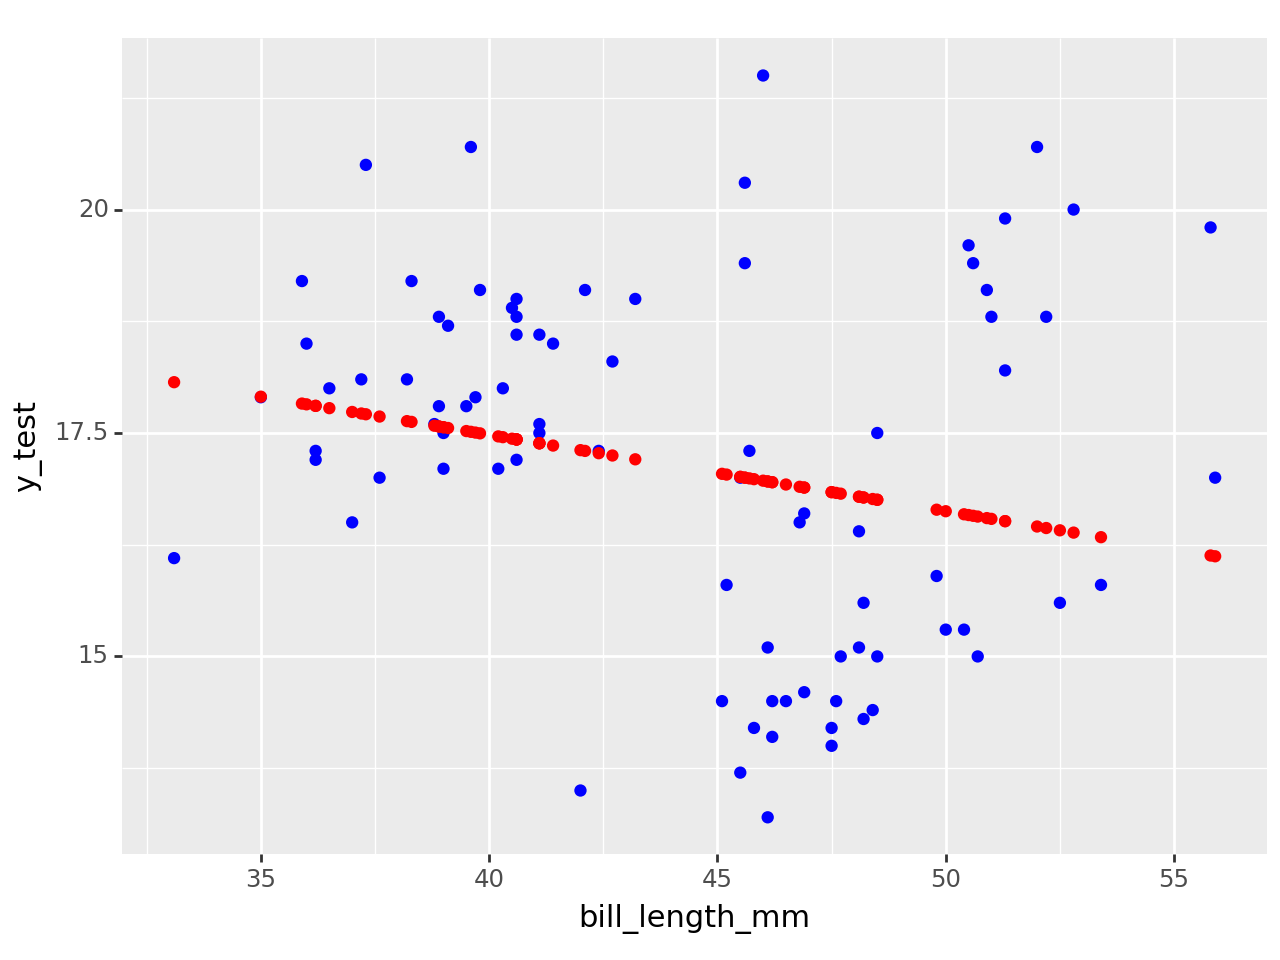

<Figure Size: (640 x 480)>

In [30]:
linear_regression_plot = (
    ggplot(X_test, aes(x='bill_length_mm'))
    + geom_point(aes(y='y_test'), color = 'blue')
    + geom_point(aes(y='Y_pred'), color = 'red')

)
linear_regression_plot

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

## **Quadratic (degree 2 polynomial) model**

In [31]:
# Quadratic (degree 2 polynomial) model
## preprocessing: Quadratic
## model spec: Polynomial regressions


# prepping your preprocessing
lr = LinearRegression()
enc = OneHotEncoder()

ct = ColumnTransformer([('square', PolynomialFeatures(degree=2, include_bias = False), ['bill_length_mm'])])


# put them together into a pipline which does the preprocessing steps
pipeline = Pipeline([('Polynomial Features',ct),('OLS', lr)])



fitted_quadratic_pipeline = pipeline.fit(X_train, y_train)
fitted_quadratic_pipeline

Pipeline(steps=[('Polynomial Features',
                 ColumnTransformer(transformers=[('square',
                                                  PolynomialFeatures(include_bias=False),
                                                  ['bill_length_mm'])])),
                ('OLS', LinearRegression())])

In [32]:
# Making prediction with the fitted pipeline
y_preds_quadratic = fitted_quadratic_pipeline.predict(X_test)
y_preds_quadratic

array([16.79351843, 17.66072009, 17.18791253, 16.58617119, 16.9294572 ,
       16.58954557, 16.59796778, 16.74294789, 17.68544211, 16.61903567,
       18.62488132, 16.61903567, 17.47305762, 17.92058245, 16.61482201,
       17.32360213, 16.59543974, 17.51828762, 16.85107826, 17.2443796 ,
       17.68551152, 16.75250013, 16.80447535, 16.77244741, 16.92949603,
       16.60387568, 17.16965205, 17.08256369, 16.60723751, 17.16965205,
       18.23887923, 17.66078872, 16.79348823, 17.36489902, 16.58560971,
       16.61483339, 16.59543974, 16.83903172, 16.60078499, 16.7623333 ,
       17.22527631, 16.61089988, 17.08256369, 17.49553215, 16.60387568,
       18.33158711, 17.03368191, 16.59796778, 16.61483339, 16.70754832,
       16.88900352, 17.04974   , 16.58814049, 16.59123158, 17.38596887,
       17.51828762, 17.34411011, 16.58814049, 17.49553215, 17.15172231,
       17.16965205, 16.94350363, 16.63336225, 17.00254148, 16.61482201,
       17.54132402, 18.30040355, 16.60078499, 16.61088929, 19.31

In [33]:
X_test['Y_pred_quadratic'] = y_preds_quadratic
X_test.head()

,bill_length_mm,y_test,Y_pred,Y_pred_quadratic
318,50.9,19.1,16.547810,16.793518
88,38.3,19.2,17.624224,17.660720
29,40.5,18.9,17.436278,17.187913
337,46.8,16.5,16.898071,16.586171
79,42.1,19.1,17.299591,16.929457


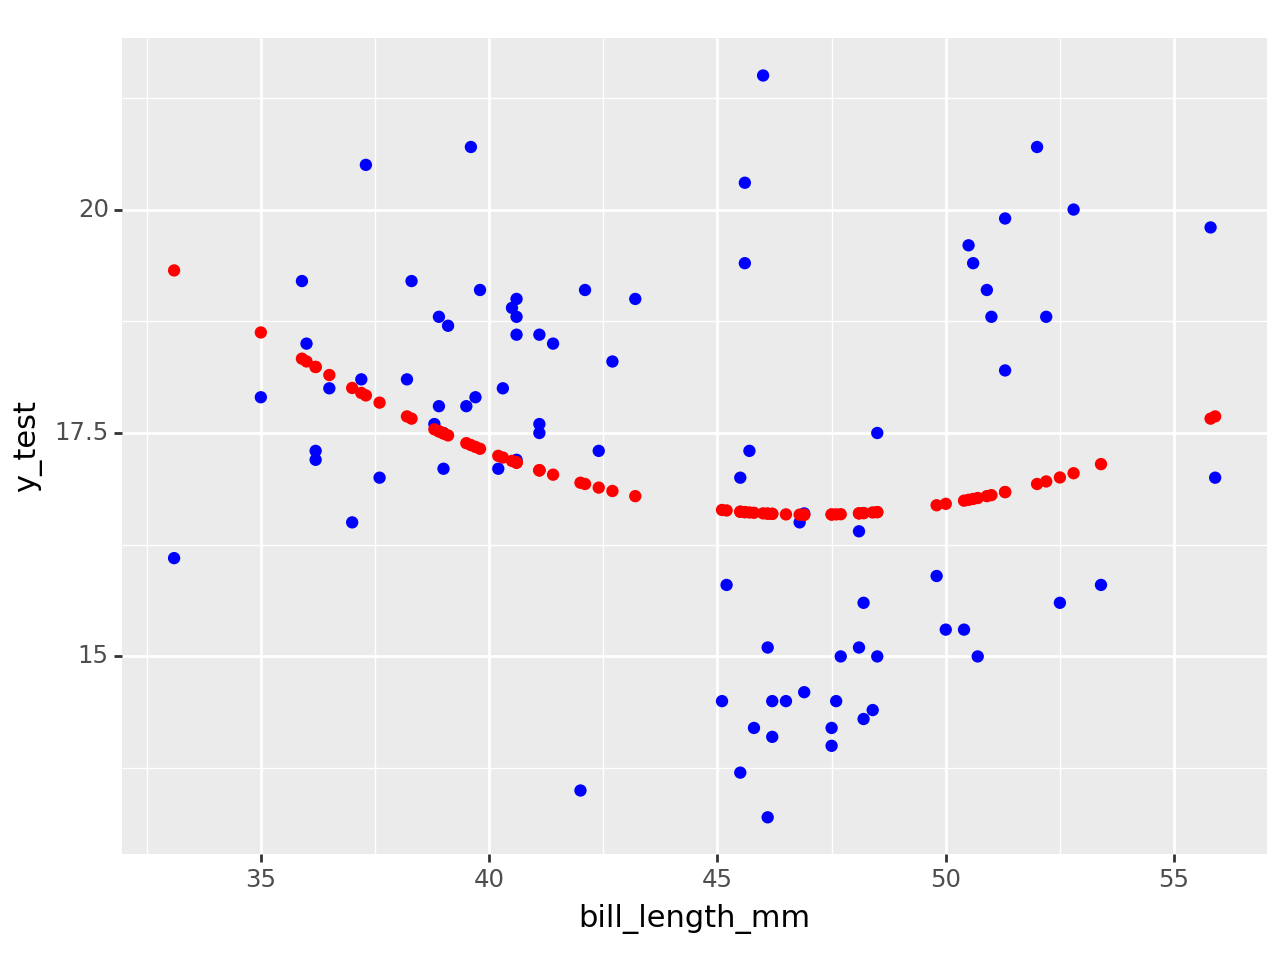

<Figure Size: (640 x 480)>

In [34]:
quadratic_plot = (
    ggplot(X_test, aes(x='bill_length_mm'))
    + geom_point(aes(y='y_test'), color = 'blue')
    + geom_point(aes(y='Y_pred_quadratic'), color = 'red')

)
quadratic_plot

## **Cubic (degree 3 polynomial) model**

In [35]:
# Cubic (degree 3 polynomial) model
## preprocessing: Quadratic
## model spec: Polynomial regressions


# prepping your preprocessing
lr = LinearRegression() # create linear object
ct = ColumnTransformer([('cube', PolynomialFeatures(degree=3, include_bias = False), ['bill_length_mm'])])


# put them together into a pipline which does the preprocessing steps
pipeline = Pipeline([('Cubed Polynomial',ct),('OLS', lr)])



fitted_cubic_pipeline = pipeline.fit(X_train, y_train)
fitted_cubic_pipeline

Pipeline(steps=[('Cubed Polynomial',
                 ColumnTransformer(transformers=[('cube',
                                                  PolynomialFeatures(degree=3,
                                                                     include_bias=False),
                                                  ['bill_length_mm'])])),
                ('OLS', LinearRegression())])

In [36]:
# Making prediction with the fitted pipeline
y_preds_cubic = fitted_cubic_pipeline.predict(X_test)
y_preds_cubic

array([16.61825094, 17.83163456, 17.42532043, 16.49273754, 17.12686601,
       16.45274322, 16.54823419, 16.55383186, 17.84907585, 16.60936018,
       18.30072195, 16.60936018, 17.68785846, 17.99908631, 16.59836471,
       17.55757787, 16.53922034, 17.72442435, 17.02023425, 17.48210948,
       18.26827154, 16.56547318, 16.63302913, 16.59060731, 16.81733807,
       16.44094979, 17.40638765, 17.31197622, 16.57732476, 17.40638765,
       18.1606993 , 18.21464757, 16.93509421, 17.5950945 , 16.4863143 ,
       16.44137244, 16.53922034, 16.6812627 , 16.44176553, 16.57772962,
       17.46318747, 16.44074712, 17.31197622, 17.70618608, 16.44094979,
       18.19964026, 17.25575186, 16.54823419, 16.44137244, 16.51329526,
       17.07301495, 17.01539584, 16.45627568, 16.44964824, 17.61377698,
       17.72442435, 17.57635942, 16.45627568, 17.70618608, 17.19552031,
       17.40638765, 17.14502563, 16.64417507, 16.93562252, 16.59836471,
       17.74256714, 18.18693102, 16.44176553, 16.58768419, 18.41

In [37]:
X_test['Y_pred_cubic'] = y_preds_cubic
X_test.head()

,bill_length_mm,y_test,Y_pred,Y_pred_quadratic,Y_pred_cubic
318,50.9,19.1,16.547810,16.793518,16.618251
88,38.3,19.2,17.624224,17.660720,17.831635
29,40.5,18.9,17.436278,17.187913,17.425320
337,46.8,16.5,16.898071,16.586171,16.492738
79,42.1,19.1,17.299591,16.929457,17.126866


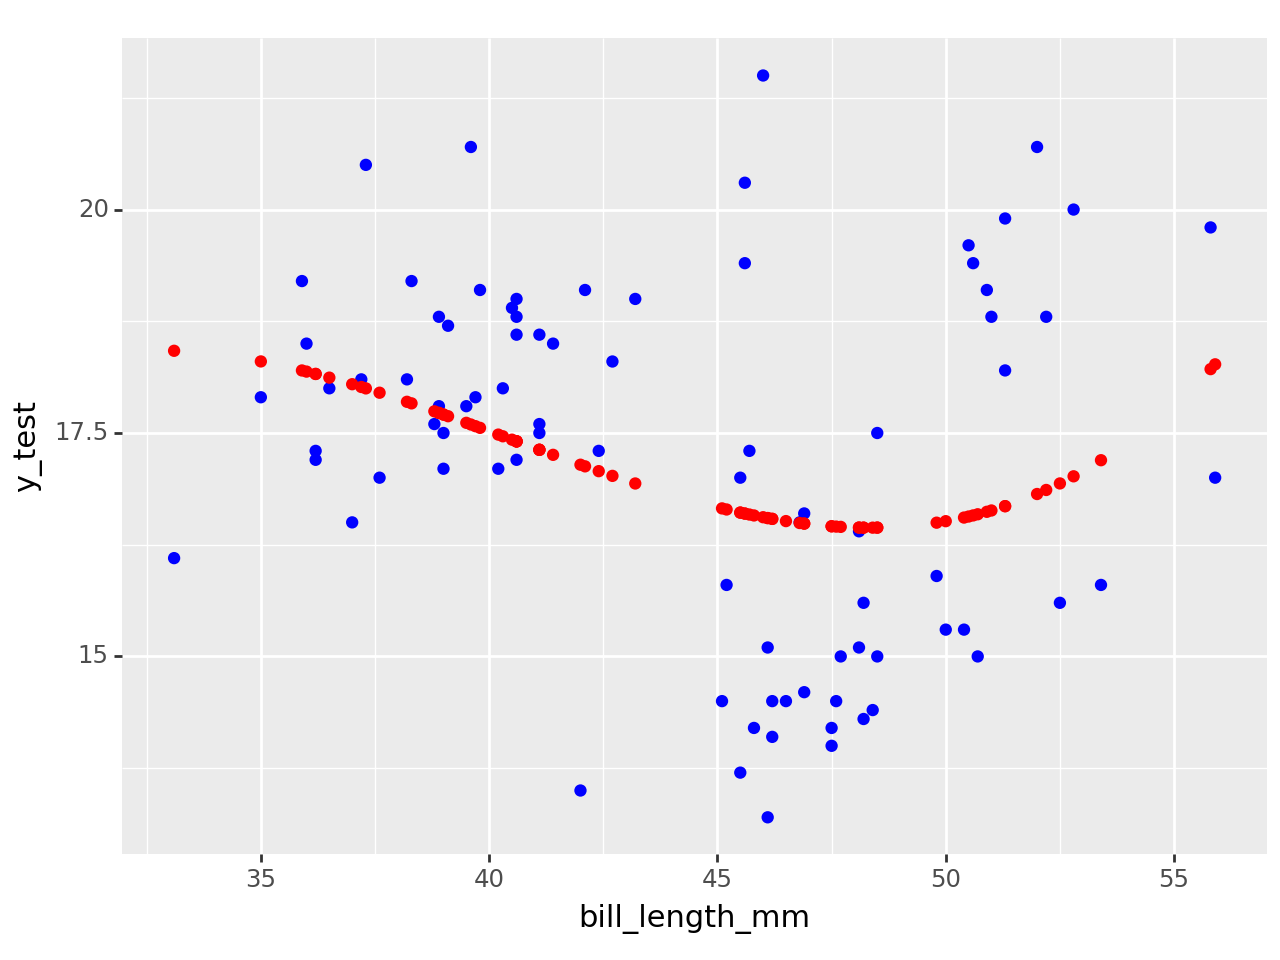

<Figure Size: (640 x 480)>

In [38]:
cubic_plot = (
    ggplot(X_test, aes(x='bill_length_mm'))
    + geom_point(aes(y='y_test'), color = 'blue')
    + geom_point(aes(y='Y_pred_cubic'), color = 'red')

)
cubic_plot

## **Degree 10 Polynomial Model**

In [39]:
# Degree (degree 10 polynomial) model
## preprocessing: Quadratic
## model spec: Polynomial regressions


# prepping your preprocessing
lr = LinearRegression() # create linear object
ct = ColumnTransformer([('Degree 10', PolynomialFeatures(degree=10, include_bias = False), ['bill_length_mm'])])


# put them together into a pipline which does the preprocessing steps
pipeline = Pipeline([('Degree 10',ct),('OLS', lr)])



fitted_10_degree_pipeline = pipeline.fit(X_train, y_train)
fitted_10_degree_pipeline

Pipeline(steps=[('Degree 10',
                 ColumnTransformer(transformers=[('Degree 10',
                                                  PolynomialFeatures(degree=10,
                                                                     include_bias=False),
                                                  ['bill_length_mm'])])),
                ('OLS', LinearRegression())])

In [40]:
# Making prediction with the fitted pipeline
y_preds_degree10 = fitted_10_degree_pipeline.predict(X_test)
y_preds_degree10

array([17.51261825, 18.47544724, 18.02284285, 15.59268556, 17.27691728,
       15.70462133, 15.62050194, 17.157585  , 18.47579048, 15.73109705,
       17.66022567, 15.73109705, 18.40710352, 18.39833691, 15.70749509,
       18.25429357, 15.60960906, 18.43506398, 16.95648642, 18.13093334,
       17.77536295, 17.22834592, 17.58330317, 17.37050802, 18.24100158,
       15.88965544, 17.98406619, 17.77171738, 15.66635738, 17.98406619,
       18.12414943, 17.86796829, 16.68952415, 18.30642884, 15.59816923,
       16.01303779, 15.60960906, 17.79212941, 15.85298599, 17.29936477,
       18.09632005, 15.96972411, 17.77171738, 18.42197955, 15.88965544,
       18.02093495, 17.63143579, 15.62050194, 16.01303779, 16.87967358,
       17.11756836, 18.63157264, 15.68211365, 15.72954283, 18.33000301,
       18.43506398, 18.28118305, 15.68211365, 18.42197955, 18.79352295,
       17.98406619, 17.32931698, 15.8134244 , 18.50514056, 15.70749509,
       18.44634494, 18.05648468, 15.85298599, 15.68589916, 16.84

In [41]:
X_test['Y_pred_Degree_10'] = y_preds_degree10
X_test.head()

,bill_length_mm,y_test,Y_pred,Y_pred_quadratic,Y_pred_cubic,Y_pred_Degree_10
318,50.9,19.1,16.547810,16.793518,16.618251,17.512618
88,38.3,19.2,17.624224,17.660720,17.831635,18.475447
29,40.5,18.9,17.436278,17.187913,17.425320,18.022843
337,46.8,16.5,16.898071,16.586171,16.492738,15.592686
79,42.1,19.1,17.299591,16.929457,17.126866,17.276917


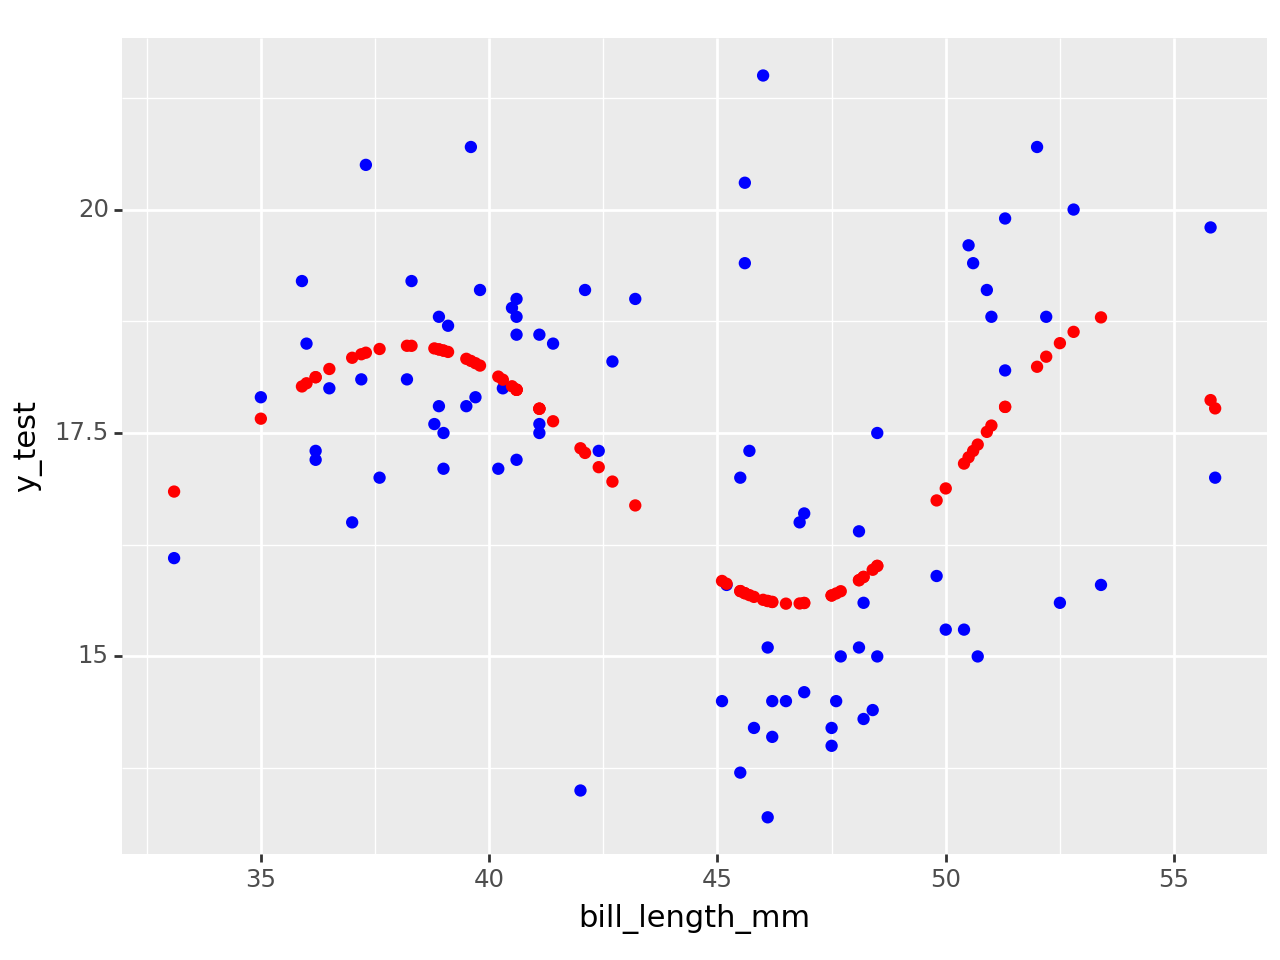

<Figure Size: (640 x 480)>

In [42]:
degree_10_plot = (
    ggplot(X_test, aes(x='bill_length_mm'))
    + geom_point(aes(y='y_test'), color = 'blue')
    + geom_point(aes(y='Y_pred_Degree_10'), color = 'red')

)
degree_10_plot

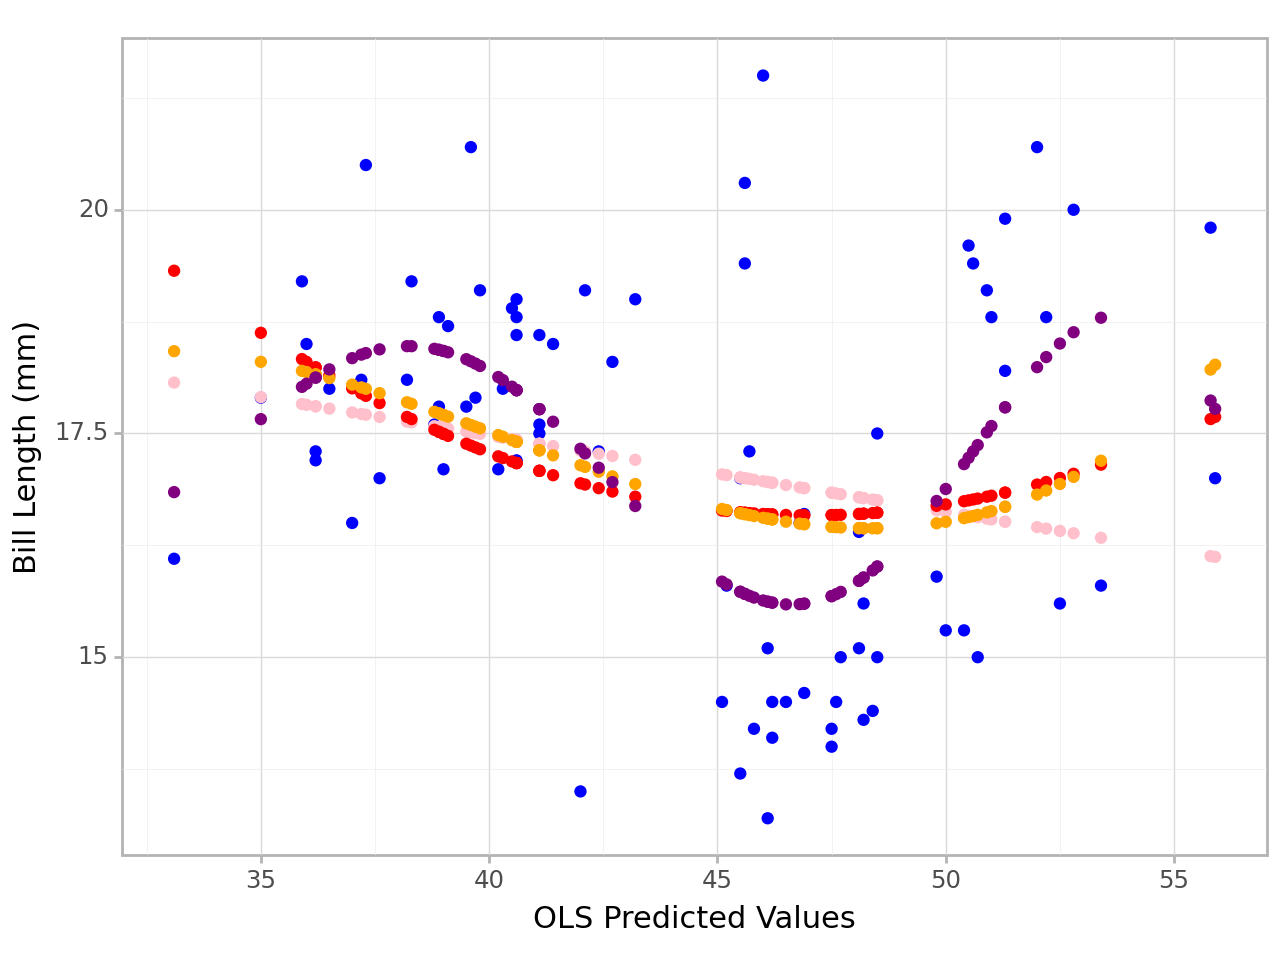

<Figure Size: (640 x 480)>

In [43]:

plot_all_models = (
    ggplot(X_test, aes(x='bill_length_mm'))
    + geom_point(aes(y="y_test"), color='blue')
    + geom_point(aes(y="Y_pred"), color='pink')
    + geom_point(aes(y="Y_pred_quadratic"), color='red')
    + geom_point(aes(y="Y_pred_cubic"), color='orange')
    + geom_point(aes(y="Y_pred_Degree_10"), color='purple')
    + labs(x='OLS Predicted Values', y='Bill Length (mm)')
    #+ ggtitle('Scatter Plot of OLS Predicted Values vs. Bill Length')
    + theme_light()
)
plot_all_models

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

In this case, the linear regression model indicated by the pink line of fit is underfitting the data. The line does not capture the trend of blue points well and this can be seen by the straightness of the line. On the other hand, the degree 10's polynomial model is excessively overfitting the data. The line indicated by the purple line is oscillating extensively and capturing each blue point. I think the quadratic and cubic models fits the data best, seen by the red and orange lines of fit, as they capture the spread of the test data better than the linear model while also capturing the main trend of the data spread.